In [2]:
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

In [3]:
store_data1 = pd.read_csv(r'C:/Users/Naim/rossmann-store-sales/data/store.csv')
test_data1 = pd.read_csv(r'C:/Users/Naim/rossmann-store-sales/data/test.csv')
train_data1 = pd.read_csv(r'C:/Users/Naim/rossmann-store-sales/data/train.csv')

C:\Users\Naim\AppData\Local\Temp\ipykernel_14880\3073885762.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data1 = pd.read_csv(r'C:/Users/Naim/rossmann-store-sales/data/train.csv')


In [4]:
from rossmann_store_salesanlysis import process_datasets
train_data, test_data, store_data = process_datasets(train_data1, test_data1, store_data1)


2024-09-24 16:31:19,363 - INFO - Logger setup complete. Logging to both file and console.
2024-09-24 16:31:19,365 - INFO - Processing train dataset.
2024-09-24 16:31:19,366 - INFO - Starting outlier detection and removal.
2024-09-24 16:31:19,367 - INFO - Checking outliers for column: Sales
2024-09-24 16:31:19,430 - INFO - Found 26694 outliers in column Sales.
2024-09-24 16:31:19,628 - INFO - Outliers removed from column Sales.
2024-09-24 16:31:19,628 - INFO - Checking outliers for column: Customers
2024-09-24 16:31:19,667 - INFO - Found 22641 outliers in column Customers.
2024-09-24 16:31:19,743 - INFO - Outliers removed from column Customers.
2024-09-24 16:31:19,745 - INFO - Processing test dataset.
2024-09-24 16:31:19,746 - INFO - Starting outlier detection and removal.
2024-09-24 16:31:19,747 - INFO - Processing store dataset.
2024-09-24 16:31:19,748 - INFO - Starting outlier detection and removal.
2024-09-24 16:31:19,749 - INFO - Checking outliers for column: CompetitionDistance
20

2024-09-24 16:31:19,784 - INFO - Checking promotion distribution between training and test sets.
2024-09-24 16:31:19,788 - INFO - Plotting the promotion distribution for the training and test sets.


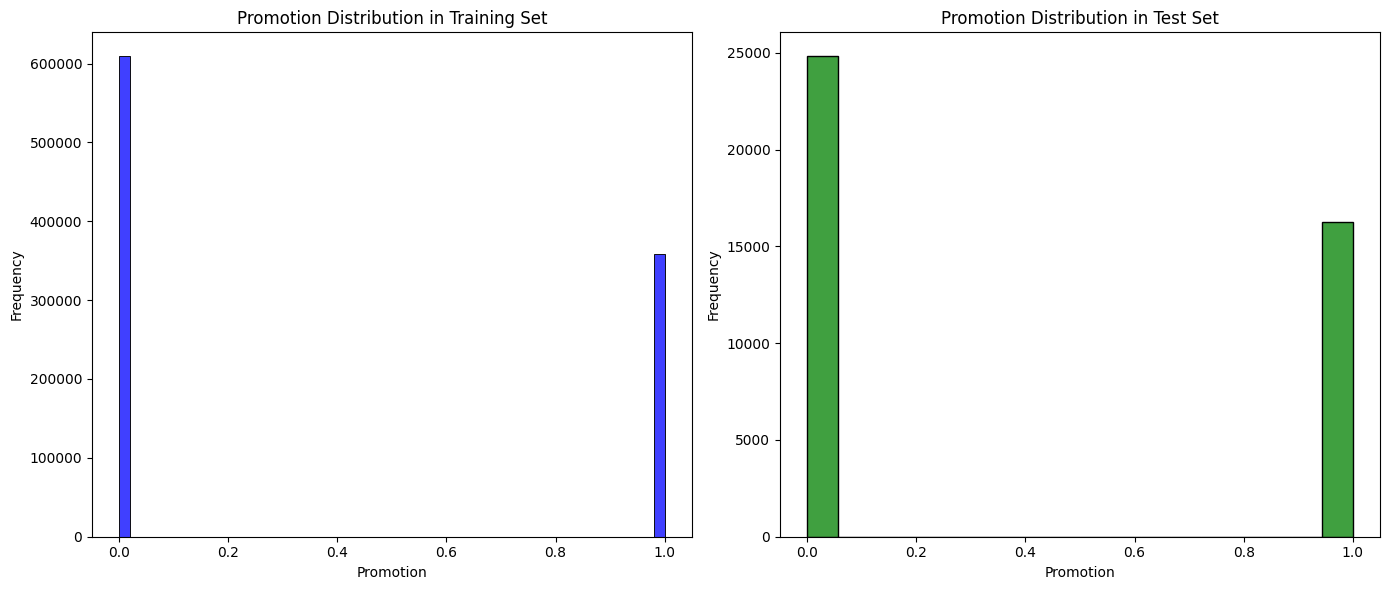

2024-09-24 16:31:22,298 - INFO - Calculating normalized promotion distribution for both datasets.
2024-09-24 16:31:22,319 - INFO - Training Set Promotion Distribution (Normalized):
Promo
0    0.629301
1    0.370699
Name: proportion, dtype: float64
2024-09-24 16:31:22,320 - INFO - Test Set Promotion Distribution (Normalized):
Promo
0    0.604167
1    0.395833
Name: proportion, dtype: float64
2024-09-24 16:31:22,322 - INFO - Percentage Difference in Promotion Distribution:
Promo
0    0.025134
1    0.025134
Name: proportion, dtype: float64


In [5]:

from rossmann_store_salesanlysis import check_promotion_distribution

# Assuming the promotion information is stored in a column named 'Promotion'
promotion_column = 'Promo'

# Call the function to check the distribution of promotions
check_promotion_distribution(train_data, test_data, promotion_column)


In [6]:
from rossmann_store_salesanlysis import merge_train_store
# Merge the datasets
merged_data = merge_train_store(train_data, store_data)

# Display the merged dataset
print(merged_data.head())

# Optionally, save the merged dataset to a new CSV file
# merged_data.to_csv('merged_train_store_data.csv', index=False)

2024-09-24 16:31:22,331 - INFO - Merging the train and store datasets on the 'Store' column.
2024-09-24 16:31:22,617 - INFO - Merge completed. The merged dataset has 871135 rows and 18 columns.


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      6          5  2015-07-31   5651        589     1      1            0   
4      8          5  2015-07-31   8492        833     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         a          a                310.0   
4              1         a          a               7520.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

In [7]:
merged_data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2622
CompetitionOpenSinceMonth    277419
CompetitionOpenSinceYear     277419
Promo2                            0
Promo2SinceWeek              407388
Promo2SinceYear              407388
PromoInterval                407388
dtype: int64

In [8]:
from rossmann_store_salesanlysis import clean_missing_values
# Clean the missing values
cleaned_data = clean_missing_values(merged_data)

# Verify if there are any remaining missing values
print(cleaned_data.isnull().sum())

# Display the first few rows of the cleaned data
print(cleaned_data.head())

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      6          5  2015-07-31   5651        589     1      1            0   
4      8          5  2015-07-31   

2024-09-24 16:31:23,146 - INFO - Starting sales behavior analysis around holidays.
2024-09-24 16:31:23,263 - INFO - Converted date column to datetime format.
2024-09-24 16:31:23,327 - INFO - Identified 534 holiday dates.
2024-09-24 16:31:23,364 - INFO - Marked periods before, during, and after each holiday.
2024-09-24 16:31:23,386 - INFO - Marked periods before, during, and after each holiday.
2024-09-24 16:31:23,406 - INFO - Marked periods before, during, and after each holiday.
2024-09-24 16:31:23,428 - INFO - Marked periods before, during, and after each holiday.
2024-09-24 16:31:23,449 - INFO - Marked periods before, during, and after each holiday.
2024-09-24 16:31:23,471 - INFO - Marked periods before, during, and after each holiday.
2024-09-24 16:31:23,492 - INFO - Marked periods before, during, and after each holiday.
2024-09-24 16:31:23,512 - INFO - Marked periods before, during, and after each holiday.
2024-09-24 16:31:23,537 - INFO - Marked periods before, during, and after e

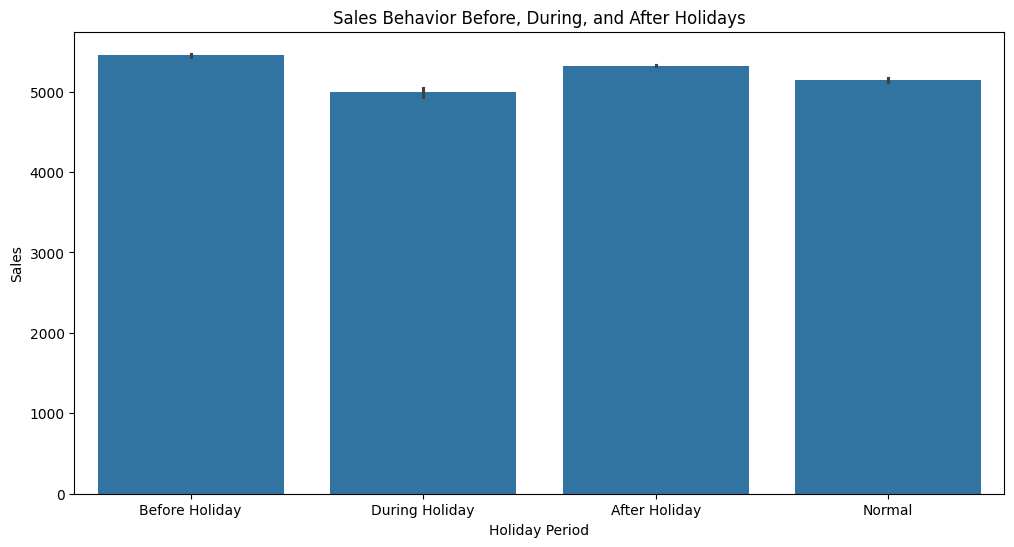

2024-09-24 16:33:03,789 - INFO - Sales Behavior Summary by Holiday Period:
                       mean  median          std   count
HolidayPeriod                                           
After Holiday   5324.293630  5565.0  3213.675036  674376
Before Holiday  5451.268194  5670.0  3385.484527   96445
During Holiday  4991.704341  5453.0  3937.604083   19049
Normal          5144.555664  5393.0  3347.558682   81265


In [9]:
from rossmann_store_salesanlysis import sales_behavior_holidays_auto
# Specify the sales and date columns
sales_column = 'Sales'  
date_column = 'Date'   

# Specify the holiday columns
state_holiday_column = 'StateHoliday'  
school_holiday_column = 'SchoolHoliday' 

# Call the function to compare sales behavior before, during, and after holidays
sales_behavior_holidays_auto(merged_data, sales_column, date_column, state_holiday_column, school_holiday_column, days_before=7, days_after=7)



In [10]:
merged_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,HolidayPeriod
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,None,After Holiday
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",After Holiday
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",After Holiday
3,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,0.0,0.0,None,After Holiday
4,8,5,2015-07-31,8492,833,1,1,0,1,a,a,7520.0,10.0,2014.0,0,0.0,0.0,None,After Holiday


2024-09-24 16:33:04,068 - INFO - Starting extended holiday sales behavior analysis.
2024-09-24 16:33:04,224 - INFO - Converted 'Date' column to datetime format.
2024-09-24 16:33:06,079 - INFO - Found 168 state holidays and 478 school holidays.
2024-09-24 16:33:06,113 - INFO - Combined unique holidays: 534 total holidays identified.
2024-09-24 16:33:34,951 - INFO - Generating sales behavior plot.


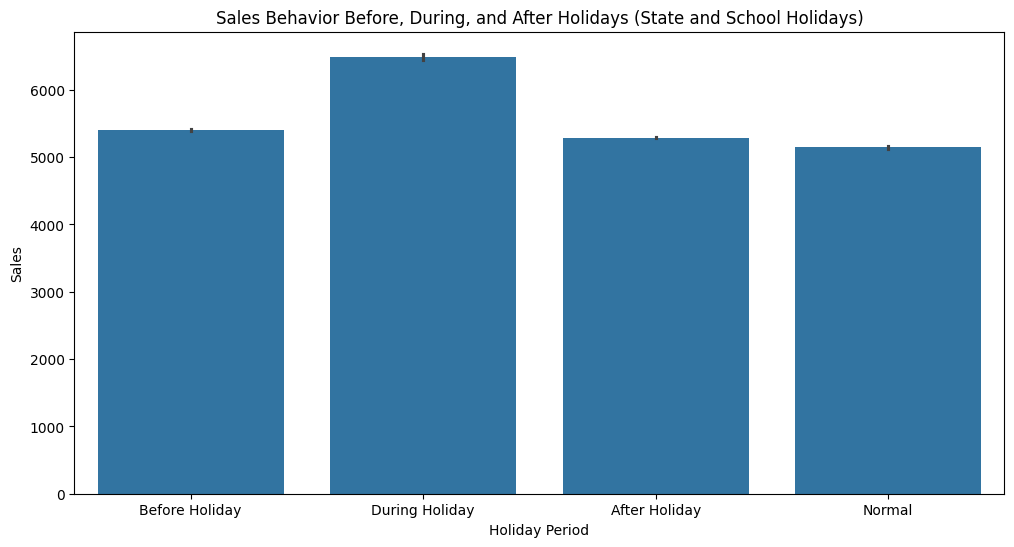

2024-09-24 16:34:09,698 - INFO - Sales Behavior Summary by Holiday Period:
                       mean  median          std   count
HolidayPeriod                                           
After Holiday   5287.102277  5532.0  3207.552802  661509
Before Holiday  5403.281072  5697.0  3485.682523  109634
During Holiday  6491.233033  6585.0  3301.746026   18727
Normal          5144.555664  5393.0  3347.558682   81265


,mean,median,std,count
HolidayPeriod,,,,
After Holiday,5287.102277,5532.0,3207.552802,661509
Before Holiday,5403.281072,5697.0,3485.682523,109634
During Holiday,6491.233033,6585.0,3301.746026,18727
Normal,5144.555664,5393.0,3347.558682,81265


In [11]:
from rossmann_store_salesanlysis import sales_behavior_holidays_extended
# Specify the sales, date, StateHoliday, and SchoolHoliday columns
sales_column = 'Sales'  
date_column = 'Date'    
state_holiday_column = 'StateHoliday'  
school_holiday_column = 'SchoolHoliday'  

# Call the function to compare sales behavior before, during, and after holidays
sales_behavior_holidays_extended(merged_data, sales_column, date_column, state_holiday_column, school_holiday_column, days_before=7, days_after=7)


2024-09-24 16:34:09,783 - INFO - Starting seasonal purchase behavior analysis.


2024-09-24 16:34:09,941 - INFO - Converted Date to datetime format.
2024-09-24 16:34:10,312 - INFO - Defined Christmas and Easter masks.
2024-09-24 16:34:10,515 - INFO - Defined public holiday mask.
2024-09-24 16:34:10,528 - INFO - Updated Season column based on holiday type.
2024-09-24 16:34:10,530 - INFO - Plotting sales behavior by season.


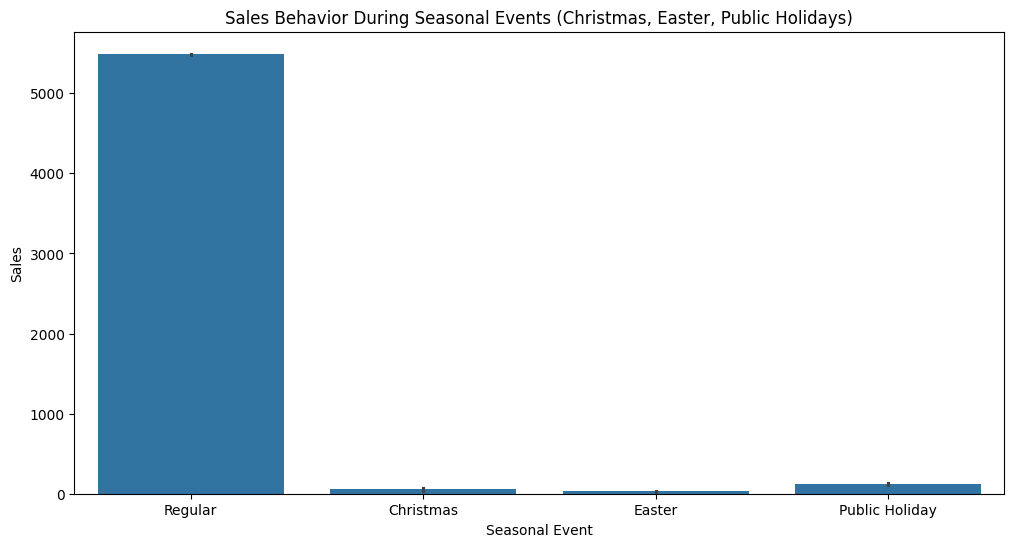

2024-09-24 16:35:38,579 - INFO - Sales Behavior Summary by Season:
                       mean  median          std   count
Season                                                  
Christmas         54.842436     0.0   595.079129    3662
Easter            28.912949     0.0   421.284825    5962
Public Holiday   116.861602     0.0   913.986665   18100
Regular         5486.049254  5664.0  3171.467088  843411


,mean,median,std,count
Season,,,,
Christmas,54.842436,0.0,595.079129,3662
Easter,28.912949,0.0,421.284825,5962
Public Holiday,116.861602,0.0,913.986665,18100
Regular,5486.049254,5664.0,3171.467088,843411


In [12]:
from rossmann_store_salesanlysis import seasonal_purchase_behavior
sales_column = 'Sales'  
date_column = 'Date'    
state_holiday_column = 'StateHoliday'  

# Call the function to analyze seasonal purchase behaviors
seasonal_purchase_behavior(merged_data, sales_column, date_column, state_holiday_column)


2024-09-24 16:35:39,441 - INFO - Starting sales and customers correlation analysis.
2024-09-24 16:35:39,527 - INFO - Calculated correlation between Sales and Customers: 0.9117
2024-09-24 16:35:39,528 - INFO - Generating scatter plot for sales and customers.


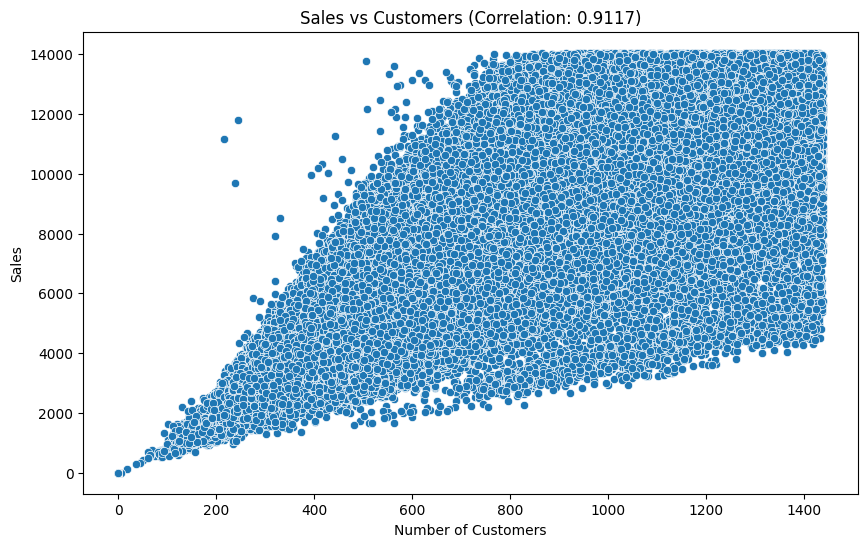

2024-09-24 16:35:45,365 - INFO - Generating joint plot for deeper correlation analysis.


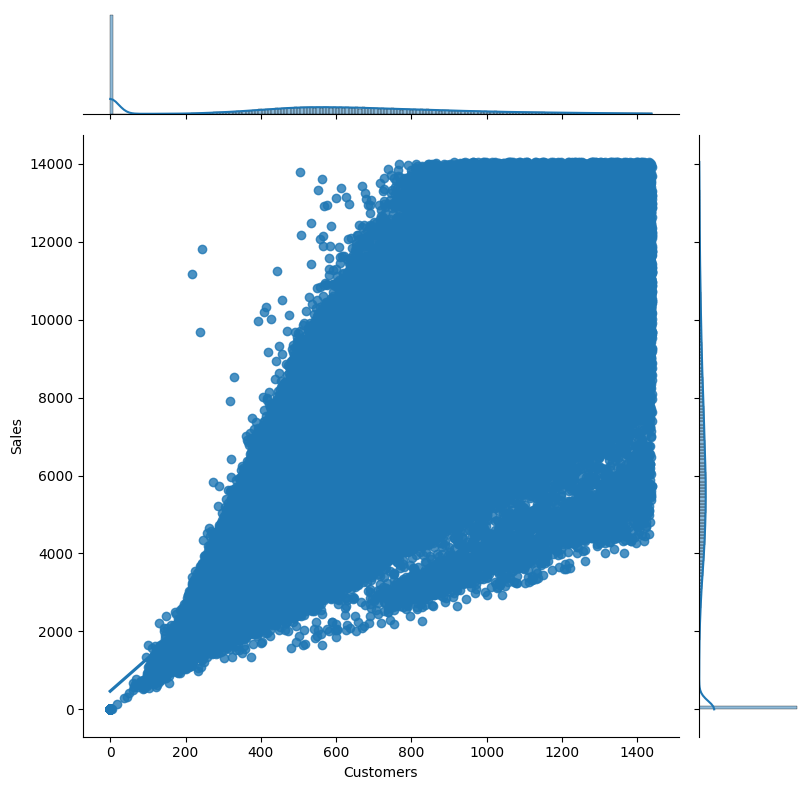

In [13]:
from rossmann_store_salesanlysis import analyze_sales_customers_correlation
sales_column = 'Sales' 
customers_column = 'Customers'

# Call the function to analyze correlation between sales and customers
analyze_sales_customers_correlation(merged_data, sales_column, customers_column)


2024-09-24 16:41:44,151 - INFO - Starting promo effect analysis on sales and customers.
2024-09-24 16:41:48,070 - INFO - Found 322832 promo days and 548303 non-promo days.
2024-09-24 16:41:48,345 - INFO - Calculated Sales per Customer.
2024-09-24 16:41:48,347 - INFO - Plotting Sales on Promo vs Non-Promo Days.


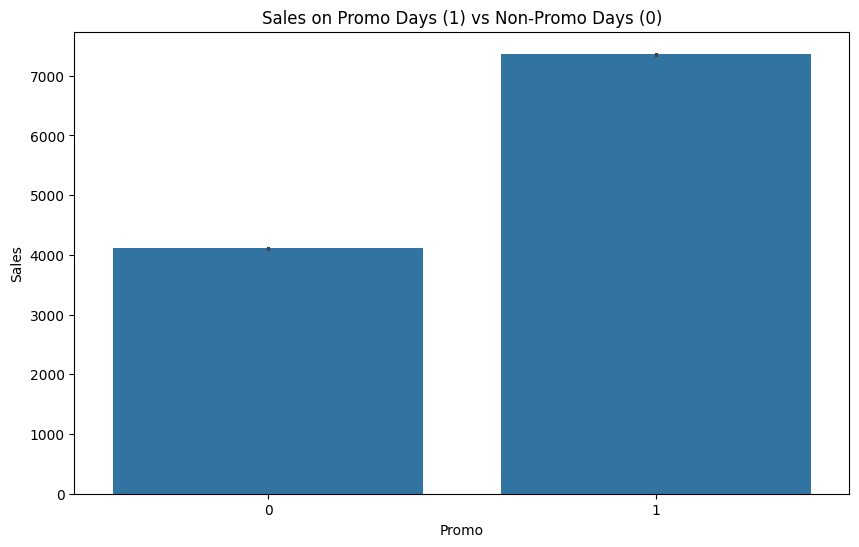

2024-09-24 16:42:28,048 - INFO - Plotting Number of Customers on Promo vs Non-Promo Days.


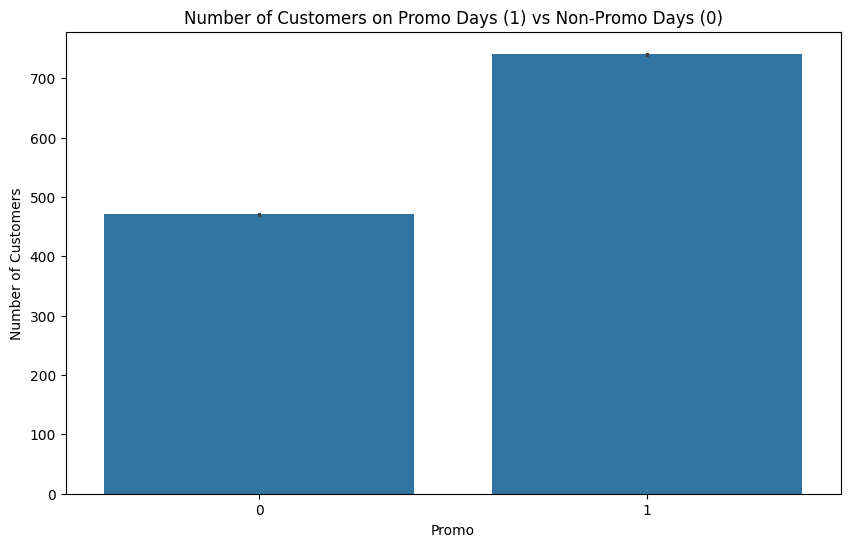

2024-09-24 16:42:50,217 - INFO - Plotting Sales Per Customer on Promo vs Non-Promo Days.


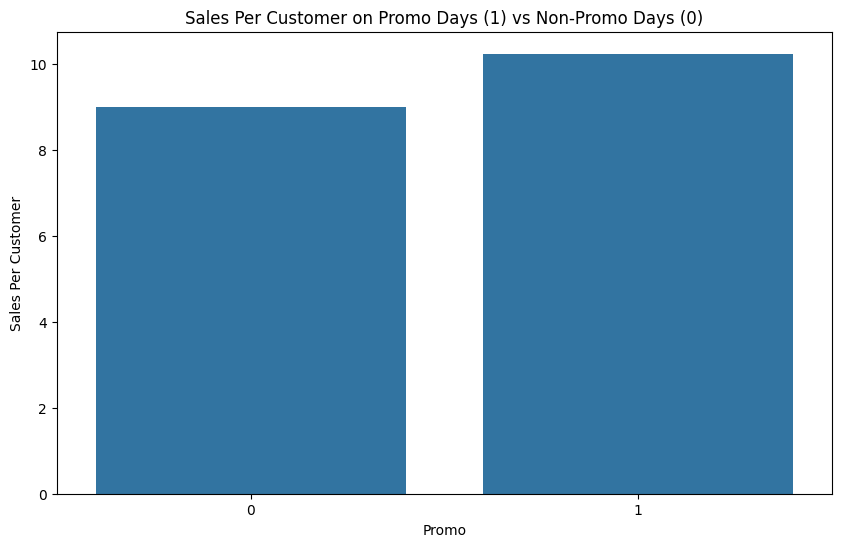

2024-09-24 16:43:13,983 - INFO - Promo Effect Summary (Sales, Customers, Sales Per Customer):
             Sales                                Customers         \
              mean  median          std   count        mean median   
Promo                                                                
0      4109.836986  4509.0  3011.218655  548303  470.956703  501.0   
1      7360.009990  7280.0  2589.154204  322832  740.251478  720.0   

                          SalesPerCustomer                              
              std   count             mean    median       std   count  
Promo                                                                   
0      352.428994  548303         8.990943  8.761155  1.930327  401752  
1      273.106748  322832        10.227949  9.984929  2.203534  312634  


Sales                                Customers         \
              mean  median          std   count        mean median   
Promo                                                                
0      4109.836986  4509.0  3011.218655  548303  470.956703  501.0   
1      7360.009990  7280.0  2589.154204  322832  740.251478  720.0   

                          SalesPerCustomer                              
              std   count             mean    median       std   count  
Promo                                                                   
0      352.428994  548303         8.990943  8.761155  1.930327  401752  
1      273.106748  322832        10.227949  9.984929  2.203534  312634

In [14]:
from rossmann_store_salesanlysis import analyze_promo_effects
sales_column = 'Sales'  
customers_column = 'Customers'  
promo_column = 'Promo'  
# Call the function to analyze the effect of promotions
analyze_promo_effects(merged_data, sales_column, customers_column, promo_column)


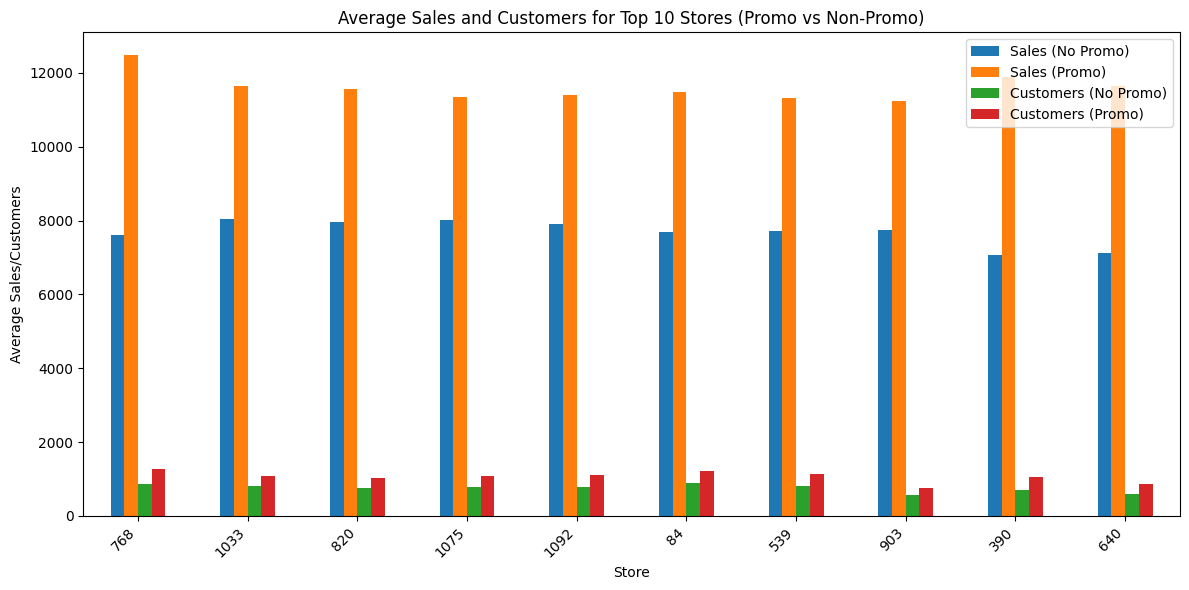

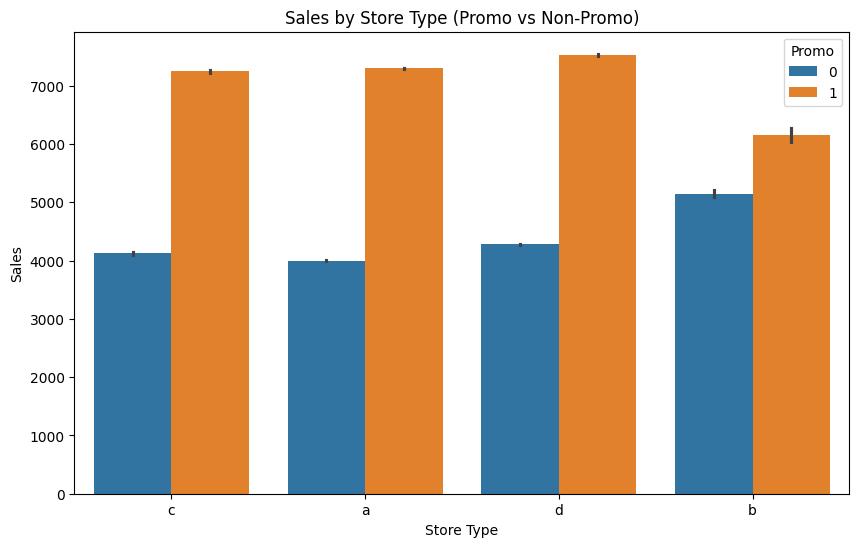


Promo Effectiveness Summary for Top 10 Stores (Sales and Customers):
                    Sales                      Customers                  
                    mean          std count        mean         std count
Store Promo                                                              
1     0      3198.994845  2052.472060   582  399.682131  250.880900   582
      1      5152.886111  1209.962568   360  577.522222  126.158363   360
2     0      2855.058419  1893.487434   582  366.876289  246.250761   582
      1      6172.816667  1421.844953   360  678.702778  138.557644   360
3     0      3949.535284  2565.501189   581  475.549053  307.214706   581
...                  ...          ...   ...         ...         ...   ...
1113  1      7320.086111  1625.789190   360  754.250000  145.336565   360
1114  0       244.212903  1512.013683   155   33.193548  205.191836   155
      1         0.000000     0.000000     7    0.000000    0.000000     7
1115  0      4082.221649  2735.274151   5

In [15]:
from rossmann_store_salesanlysis import analyze_promo_by_top_stores
# Specify the sales, customers, promo, store, and store type columns
sales_column = 'Sales'  
customers_column = 'Customers'  
promo_column = 'Promo'  
store_column = 'Store' 
store_type_column = 'StoreType'  

# Call the function to analyze the effect of promotions by store and store type
analyze_promo_by_top_stores(merged_data, sales_column, customers_column, promo_column, store_column, store_type_column)


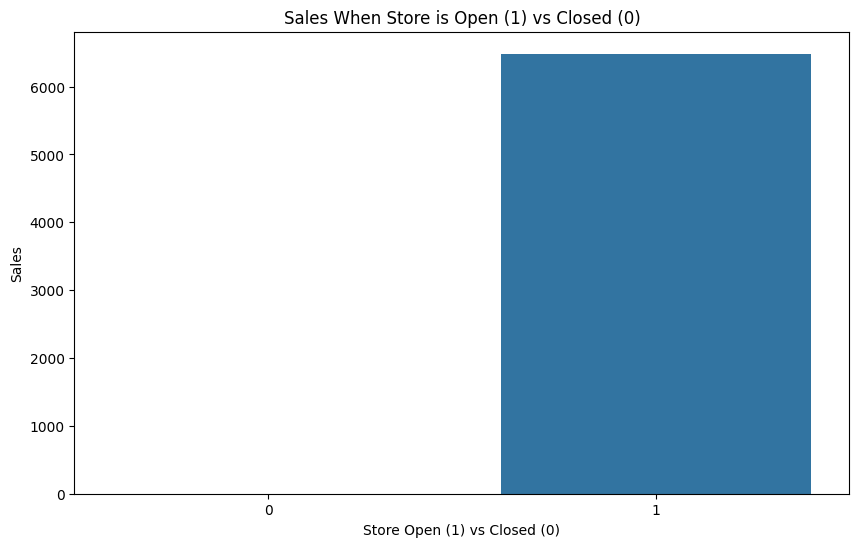

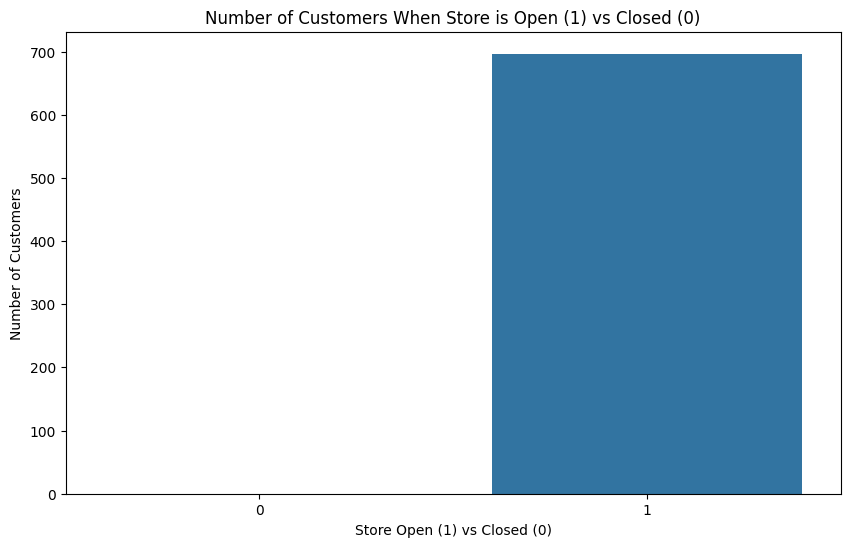

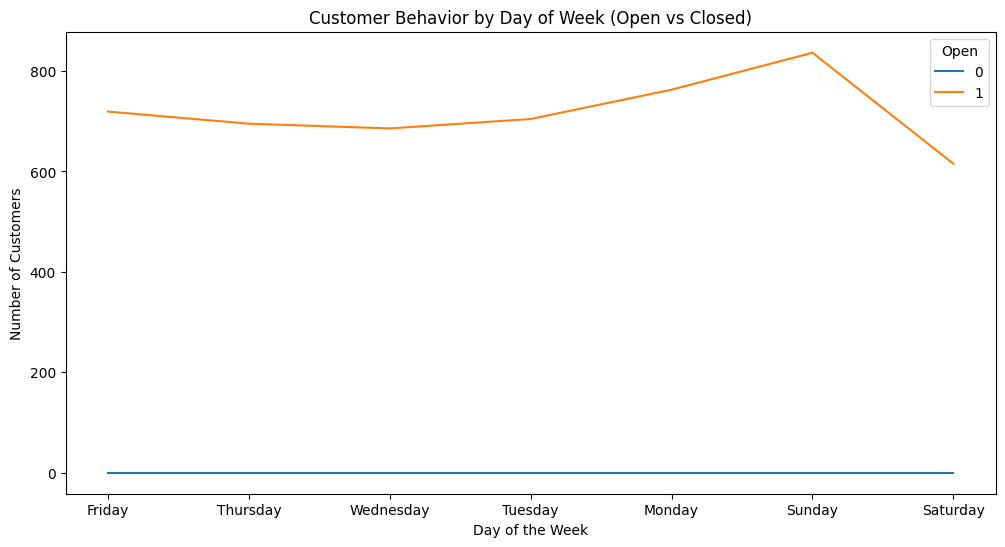

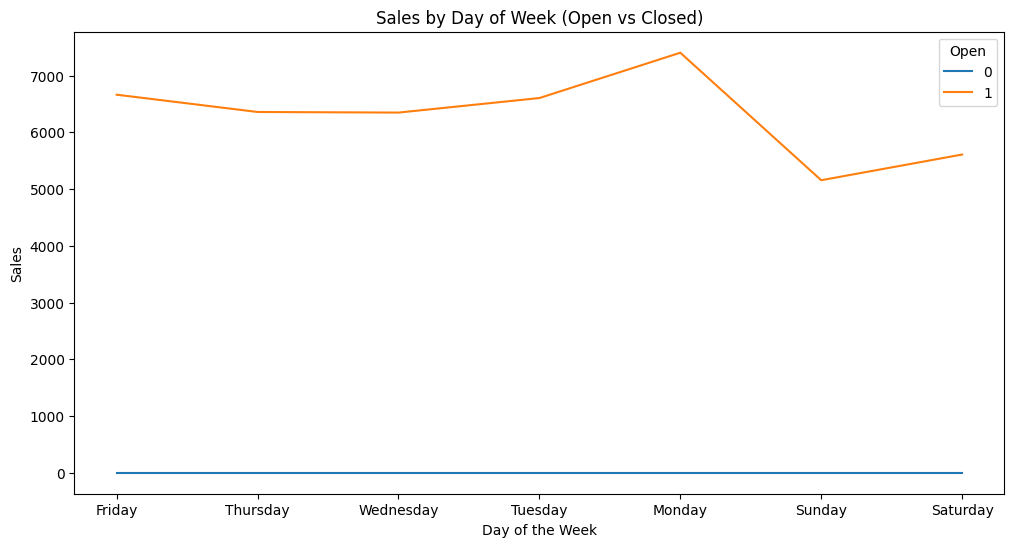


Store Opening and Closing Summary (Sales and Customers):
             Sales                                Customers                     \
             mean  median          std   count        mean median         std   
Open                                                                            
0        0.000000     0.0     0.000000  156698    0.000000    0.0    0.000000   
1     6479.903328  6176.0  2332.294572  714437  695.937974  658.0  250.064425   

              
       count  
Open          
0     156698  
1     714437  


In [16]:
from rossmann_store_salesanlysis import analyze_store_opening_closing_behavior
sales_column = 'Sales'  
customers_column = 'Customers'  
open_column = 'Open' 
date_column = 'Date'  

# Call the function to analyze customer behavior during store opening and closing times
analyze_store_opening_closing_behavior(merged_data, sales_column, customers_column, open_column, date_column)


Number of stores open on all weekdays: 989


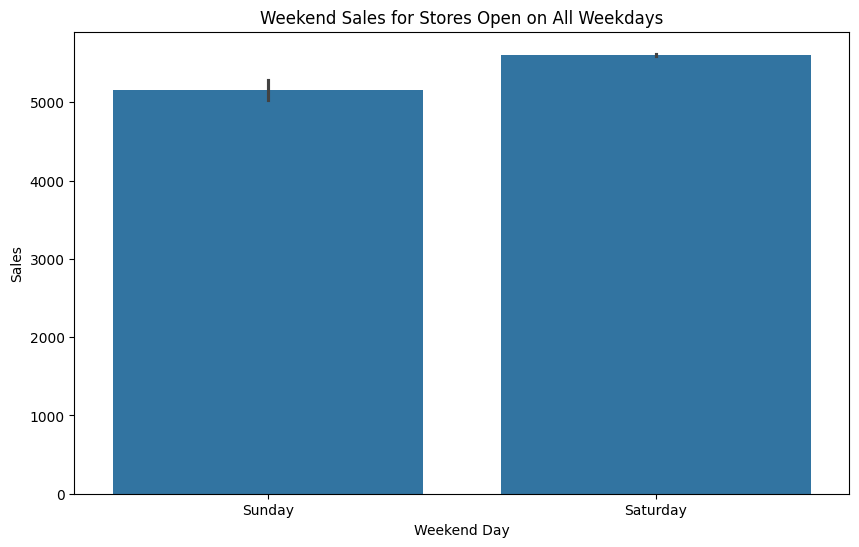


Weekend Sales Summary for Stores Open on All Weekdays:
                   mean  median          std   count
DayOfWeek                                          
Saturday   5606.616280  5351.0  2274.888383  124192
Sunday     5155.401589  5432.0  2218.431660    1133


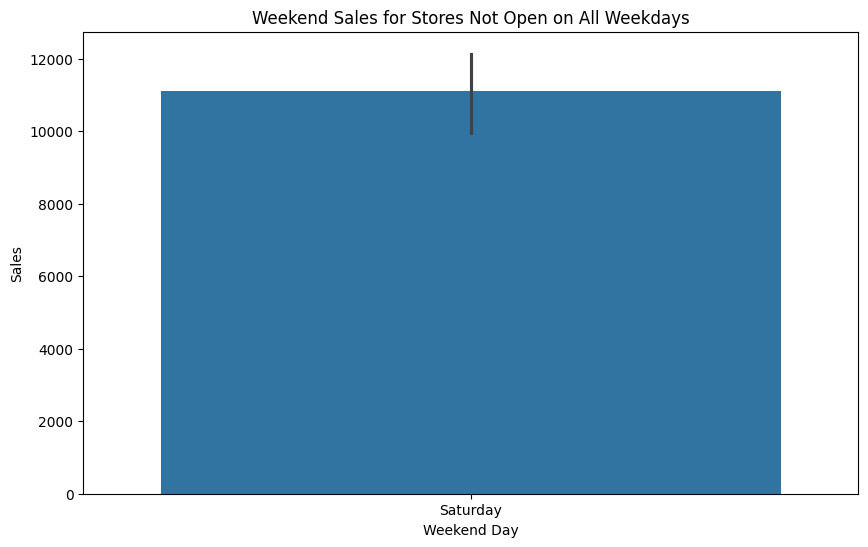


Weekend Sales Summary for Stores Not Open on All Weekdays:
                    mean   median          std  count
DayOfWeek                                           
Saturday   11111.586207  13071.0  3193.397793     29


In [17]:
from rossmann_store_salesanlysis import analyze_weekday_open_stores_and_weekend_sales

sales_column = 'Sales'  
date_column = 'Date'
store_column = 'Store'  

# Call the function to analyze stores open on all weekdays and their weekend sales
analyze_weekday_open_stores_and_weekend_sales(merged_data, sales_column, date_column, store_column)

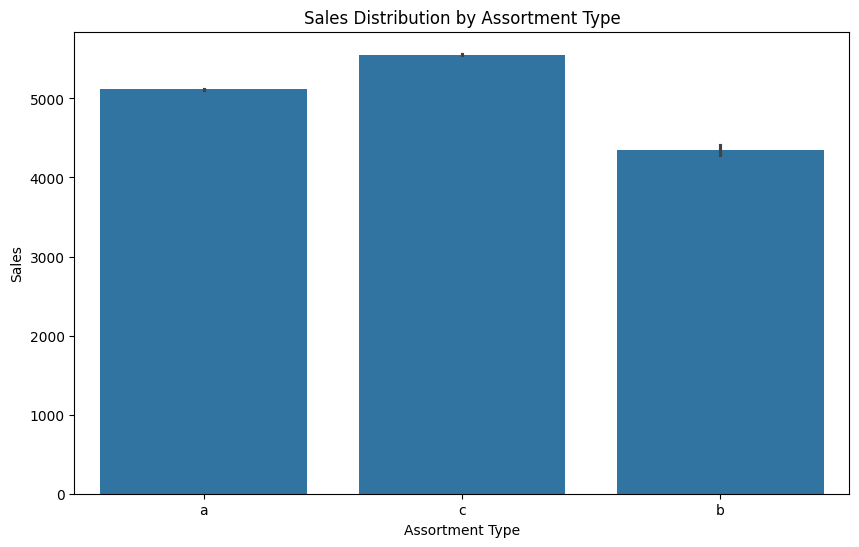


Sales Summary by Assortment Type:
                    mean  median          std   count
Assortment                                          
a           5116.394943  5322.0  3171.259521  470491
b           4345.892464  4445.5  1392.636246    2362
c           5553.853609  5854.0  3362.299587  398282


In [18]:
from rossmann_store_salesanlysis import analyze_assortment_effect_on_sales
sales_column = 'Sales'  
assortment_column = 'Assortment'  

# Call the function to analyze how assortment type affects sales
analyze_assortment_effect_on_sales(merged_data, sales_column, assortment_column)

Correlation between CompetitionDistance and Sales: 0.0320


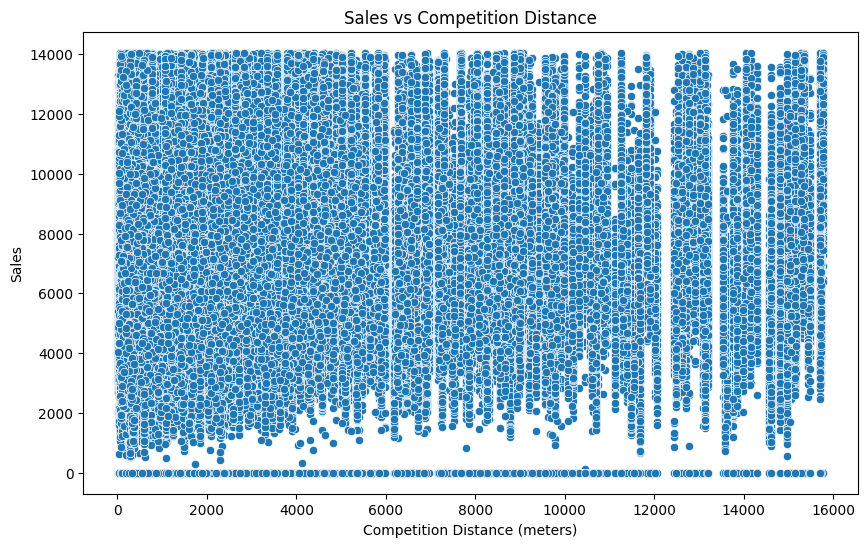

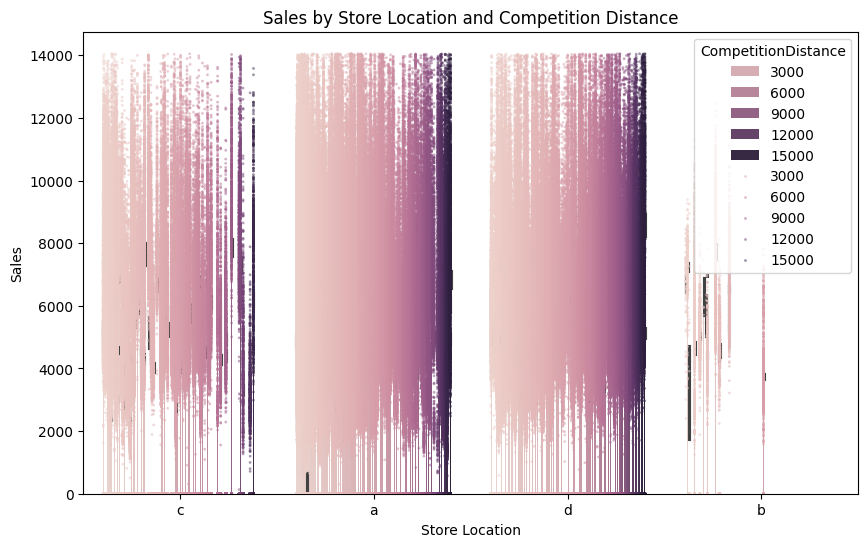


Sales Summary by Competition Distance and Store Location:
                                       mean   median          std  count
CompetitionDistance StoreType                                          
20.0                a          4851.175345   4902.0  2752.166024    941
30.0                a          4648.482190   4992.5  2531.160222   3762
40.0                a          5750.861867   6210.0  3484.622872   3417
                    c          5318.945802   5312.0  3006.384869    941
50.0                a          3768.781825   3400.0  3223.836272   2663
...                                    ...      ...          ...    ...
15490.0             d          5675.804255   6210.0  2925.678123    940
15700.0             a          6033.584881   6704.5  3263.732468    754
15710.0             a          6834.602535   7463.5  4155.176930    868
15720.0             d          5122.308917   5587.0  2647.748826    942
15770.0             d          8611.521307  10119.0  4477.906692    704

[72

In [19]:
from rossmann_store_salesanlysis import analyze_competitor_distance_effect_on_sales
sales_column = 'Sales'  
competition_distance_column = 'CompetitionDistance'  
store_type_column = 'StoreType'

# Call the function to analyze how the distance to competitors affects sales
analyze_competitor_distance_effect_on_sales(merged_data, sales_column, competition_distance_column, store_type_column)



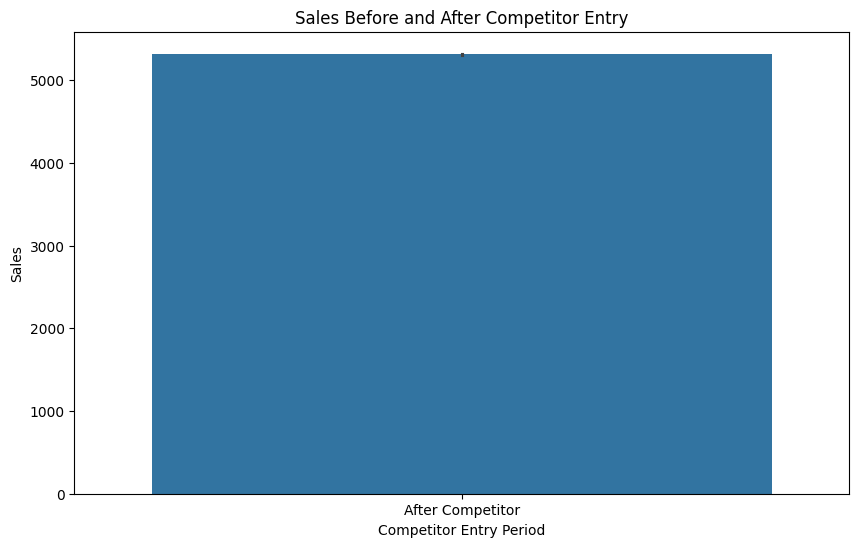

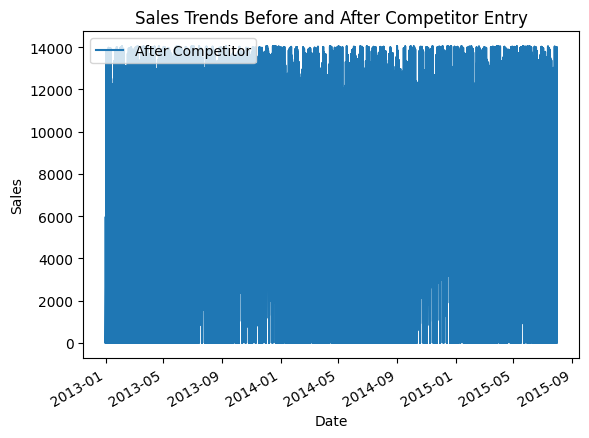


Sales Summary Before and After Competitor Entry:
                          mean  median          std   count
TimePeriod                                                
After Competitor  5314.311437  5559.0  3264.269965  871135


In [20]:
from rossmann_store_salesanlysis import analyze_new_competitors_effect_on_sales
sales_column = 'Sales'  
competition_distance_column = 'CompetitionDistance'  
date_column = 'Date'  
store_column = 'Store'  

# Call the function to analyze the effect of new competitors on sales
analyze_new_competitors_effect_on_sales(merged_data, sales_column, competition_distance_column, date_column, store_column)



In [21]:
# Check how many rows have NA in CompetitionDistance
na_count = merged_data[competition_distance_column].isna().sum()
print(f"Number of rows with NA in {competition_distance_column}: {na_count}")

# Check how many rows have non-NA in CompetitionDistance
non_na_count = merged_data[competition_distance_column].notna().sum()
print(f"Number of rows with non-NA in {competition_distance_column}: {non_na_count}")


Number of rows with NA in CompetitionDistance: 0
Number of rows with non-NA in CompetitionDistance: 871135


In [22]:
# Check which stores are open on all weekdays (Monday to Friday)
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Add a day of the week column based on the Date
merged_data['DayOfWeek'] = merged_data[date_column].dt.day_name()

# Filter data for weekdays and check how many stores are open (Open == 1)
weekday_data = merged_data[merged_data['DayOfWeek'].isin(weekdays) & (merged_data['Open'] == 1)]

# Group by store to see how many weekdays each store is open
weekday_open_counts = weekday_data.groupby(store_column)['DayOfWeek'].nunique()

# Check stores open all 5 weekdays (Monday to Friday)
stores_open_all_weekdays = weekday_open_counts[weekday_open_counts == 5].index
print(f"Number of stores open on all weekdays: {len(stores_open_all_weekdays)}")


Number of stores open on all weekdays: 989


In [23]:
# Check stores that are open fewer than 5 weekdays (Monday to Friday)
stores_not_open_all_weekdays = weekday_open_counts[weekday_open_counts < 5].index
print(f"Number of stores not open on all weekdays: {len(stores_not_open_all_weekdays)}")


Number of stores not open on all weekdays: 16
